In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import model

`label_and_features` has 76 columns which are 1 label + 75 features:
Column index numbers are from 0 to 74.
index 0 is label (0-4)
index 1-20 is global aa comp.
index 21-40 global aa comp for Nterm50.
index 41-60 global aa comp for Cterm50.
index 61 gravy for Nterm50.
index 62 gravy for Cterm50.
index 63 mol wt.
index 64 mean flex.
index 65 aromaticity.
index 66 i.p.
index 67 net charge.
index 68 mnc.
index 69 tc.
index 70 mtc.
index 71 gravy.
index 72 length.
index 73 is mito
index 74 is nuclear
index 75 is secreted

In [2]:
label_and_features = np.genfromtxt('../datasets/fiveClass.csv', delimiter=',')
# 76 cols. 75 features  + label col at 0, and 3 SP columns at end.
label_and_features.shape

(9401, 76)

In [3]:
# ONLY RUN ONCE!
# drop mtc, signal peptides and Nterm50 and Cterm50 aa comps.
cols_to_remove  = list(range(21, 61)) + [70, 73, 74, 75]
print(len(cols_to_remove))
label_and_features_less = np.delete(label_and_features, cols_to_remove, axis=1)
label_and_features_less.shape

44


(9401, 32)

In [4]:
X_train_31, X_test_31, y_train_31, y_test_31 = model.split_train_test(label_and_features_less)

In [18]:
print(X_train_31.shape)
print(X_test_31.shape)
print(y_train_31.shape)
print(y_test_31.shape)

(7520, 31)
(1881, 31)
(7520,)
(1881,)


Trained in 6 secs
Train accuracy is 100.0


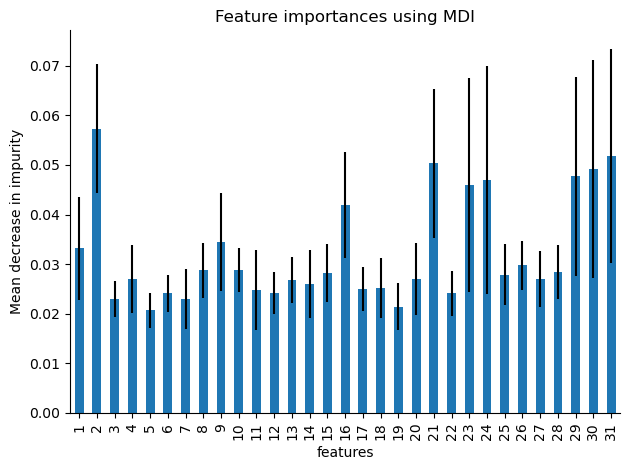

In [21]:
clf, importances = model.train_RFC(X_train_31, y_train_31)
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
feature_names = [f'{i}' for i in range(1, X_train_31.shape[1] +1)]
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title('Feature importances using MDI')
ax.set_ylabel('Mean decrease in impurity')
ax.set_xlabel('features', fontsize=10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()
plt.xticks(fontsize=10)
plt.show()


In [5]:
accuracies_31 = np.zeros(5)

In [15]:
accuracies_31 = np.zeros(5)
for i in range(5):
    print(i)
    clf, _ = model.train_RFC(X_train_31, y_train_31)
    acc = model.test_RFC(clf, X_test_31, y_test_31)
    accuracies_31[i] = acc

meanAcc = np.mean(accuracies_31)
stdAcc = np.std(accuracies_31)

print(meanAcc)
print(stdAcc)

0
Trained in 4 secs
Test accuracy is 62.7
1
Trained in 4 secs
Test accuracy is 62.7
2
Trained in 4 secs
Test accuracy is 63.4
3
Trained in 4 secs
Test accuracy is 63.4
4
Trained in 4 secs
Test accuracy is 62.4
62.92
0.40693979898751514


In [7]:
accuracies_31

array([63.2, 62.1, 63.1, 63.5, 62.9])

In [8]:
meanAcc = np.mean(accuracies_31)
stdAcc = np.std(accuracies_31)

In [9]:
meanAcc

62.96

In [27]:
imps = list(round(forest_importances * 1000))
print(imps)
print(len(imps))

[33.0, 57.0, 23.0, 27.0, 21.0, 24.0, 23.0, 29.0, 34.0, 29.0, 25.0, 24.0, 27.0, 26.0, 28.0, 42.0, 25.0, 25.0, 21.0, 27.0, 50.0, 24.0, 46.0, 47.0, 28.0, 30.0, 27.0, 28.0, 48.0, 49.0, 52.0]
31


### PREDICT WITH 31 GIVES 63.8%

In [28]:
# predict_proba()
model.test_RFC(clf, X_test_31, y_test_31)

Test accuracy is 63.8


### TRY WITH ALL 75 - GET FEAT IMPS FOR APPENDIX TABLE

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import model

In [11]:
label_and_features = np.genfromtxt('../datasets/fiveClass.csv', delimiter=',')
# 76 cols. 75 features  + label col at 0, and 3 SP columns at end.
label_and_features.shape

(9401, 76)

In [13]:
X_train_75, X_test_75, y_train_75, y_test_75 = model.split_train_test(label_and_features)

In [14]:
accuracies_75 = np.zeros(5)
for i in range(5):
    print(i)
    clf, _ = model.train_RFC(X_train_75, y_train_75)
    acc = model.test_RFC(clf, X_test_75, y_test_75)
    accuracies_75[i] = acc

meanAcc75 = np.mean(accuracies_75)
stdAcc75 = np.std(accuracies_75)

print(meanAcc75)
print(stdAcc75)

0
Trained in 5 secs
Test accuracy is 64.1
1
Trained in 4 secs
Test accuracy is 63.8
2
Trained in 4 secs
Test accuracy is 63.2
3
Trained in 5 secs
Test accuracy is 64.0
4
Trained in 4 secs
Test accuracy is 64.0
63.82000000000001
0.3249615361854364


In [7]:
print(X_train_75.shape)
print(X_test_75.shape)
print(y_train_75.shape)
print(y_test_75.shape)

(7520, 75)
(1881, 75)
(7520,)
(1881,)


Trained in 5 secs
Train accuracy is 100.0


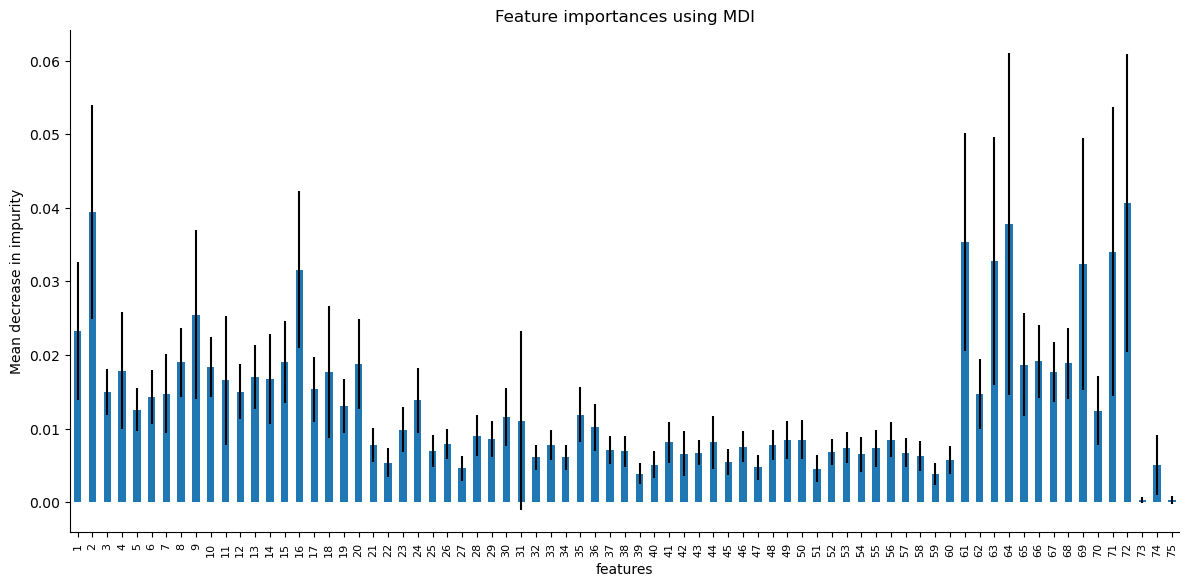

In [16]:
clf, importances = model.train_RFC(X_train_75, y_train_75)
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
feature_names = [f'{i}' for i in range(1, X_train_75.shape[1] +1)]
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots(figsize=(12, 6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title('Feature importances using MDI')
ax.set_ylabel('Mean decrease in impurity')
ax.set_xlabel('features', fontsize=10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()
plt.xticks(fontsize=8)
plt.show()


In [31]:
imps = list(round(forest_importances * 1000))
imps = ([int(imp) for imp in imps])
print(imps[:20])
print(len(imps[:20]))
Nterm50_aacomps_imps = imps[20:40]
print(Nterm50_aacomps_imps)
print(len(Nterm50_aacomps_imps))

Cterm50_aacomps_imps = imps[40:60]

print(len(Cterm50_aacomps_imps))
print(Cterm50_aacomps_imps)
print()

[23, 39, 15, 18, 13, 14, 15, 19, 25, 18, 17, 15, 17, 17, 19, 32, 15, 18, 13, 19]
20
[8, 5, 10, 14, 7, 8, 5, 9, 9, 12, 11, 6, 8, 6, 12, 10, 7, 7, 4, 5]
20
20
[8, 7, 7, 8, 5, 8, 5, 8, 8, 9, 5, 7, 7, 7, 7, 9, 7, 6, 4, 6]



In [38]:
model.test_RFC(clf, X_test_75, y_test_75)

Test accuracy is 64.5


In [39]:
proba = clf.predict_proba(X_test_75)

In [41]:
proba.shape

(1881, 5)

In [46]:
proba = proba * 100

In [48]:
proba = proba.astype(int)

In [49]:
proba

array([[24,  2,  4, 69,  1],
       [26,  3,  1, 69,  1],
       [51,  3,  2, 44,  0],
       ...,
       [25,  6, 12,  9, 48],
       [ 8,  9,  4,  1, 78],
       [32,  6,  9, 38, 15]])

### TRY WITH 24 - GET FEAT IMPS FOR APPENDIX TABLE

In [18]:
label_and_features = np.genfromtxt('../datasets/fiveClass.csv', delimiter=',')
# 76 cols. 75 features  + label col at 0, and 3 SP columns at end.
label_and_features.shape

(9401, 76)

In [19]:
# ONLY RUN ONCE!
# drop mtc, signal peptides and Nterm50 and Cterm50 aa comps.
# also drop any below 25 feature importance
cols_to_remove  = list(range(21, 61)) + [70, 73, 74, 75] + [3, 5, 6, 7, 12, 19, 62]
print(len(cols_to_remove))
label_and_features_less = np.delete(label_and_features, cols_to_remove, axis=1)
label_and_features_less.shape

51


(9401, 25)

In [20]:
X_train_24, X_test_24, y_train_24, y_test_24 = model.split_train_test(label_and_features_less)
print(X_train_24.shape)
print(X_test_24.shape)
print(y_train_24.shape)
print(y_test_24.shape)

(7520, 24)
(1881, 24)
(7520,)
(1881,)


In [21]:
accuracies_24 = np.zeros(5)
for i in range(5):
    print(i)
    clf, _ = model.train_RFC(X_train_24, y_train_24)
    acc = model.test_RFC(clf, X_test_24, y_test_24)
    accuracies_24[i] = acc

meanAcc24 = np.mean(accuracies_24)
stdAcc24 = np.std(accuracies_24)

print(meanAcc24)
print(stdAcc24)

0
Trained in 5 secs
Test accuracy is 62.0
1
Trained in 4 secs
Test accuracy is 62.6
2
Trained in 5 secs
Test accuracy is 62.1
3
Trained in 3 secs
Test accuracy is 61.9
4
Trained in 3 secs
Test accuracy is 63.1
62.339999999999996
0.4498888751680805


Trained in 4 secs
Train accuracy is 100.0


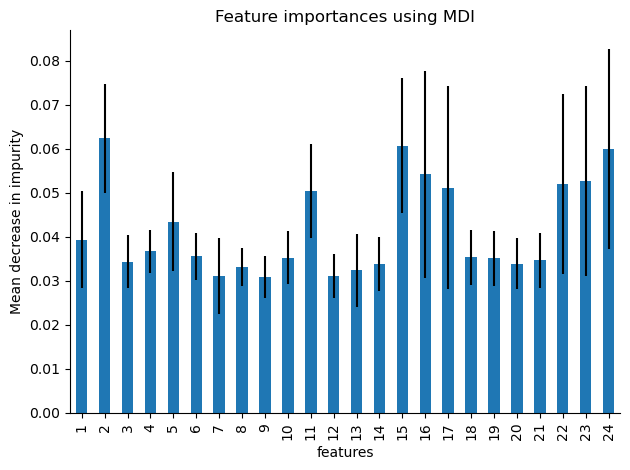

In [57]:
clf, importances = model.train_RFC(X_train_24, y_train_24)
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
feature_names = [f'{i}' for i in range(1, X_train_24.shape[1] +1)]
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title('Feature importances using MDI')
ax.set_ylabel('Mean decrease in impurity')
ax.set_xlabel('features', fontsize=10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()
plt.xticks(fontsize=10)
plt.show()


In [58]:
imps = list(round(forest_importances * 1000))
print(imps)
print(len(imps))

[39.0, 62.0, 34.0, 37.0, 43.0, 36.0, 31.0, 33.0, 31.0, 35.0, 50.0, 31.0, 32.0, 34.0, 61.0, 54.0, 51.0, 35.0, 35.0, 34.0, 35.0, 52.0, 53.0, 60.0]
24


In [59]:
model.test_RFC(clf, X_test_24, y_test_24)

Test accuracy is 61.7
